In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import fixed, interact, interact_manual, interactive
from matplotlib.colors import LinearSegmentedColormap
from skimage.color import hed2rgb, rgb2hed

In [2]:
from skimage import data, filters, io, viewer

# from scipy import constants
# from PIL import Image

/opt/conda/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


In [3]:
img1 = io.imread("blobs.tif", plugin="tifffile")
img2 = io.imread("FluorescentCells.tif", plugin="tifffile")
img3 = io.imread("FluorescentCells (2).tif", plugin="tifffile")

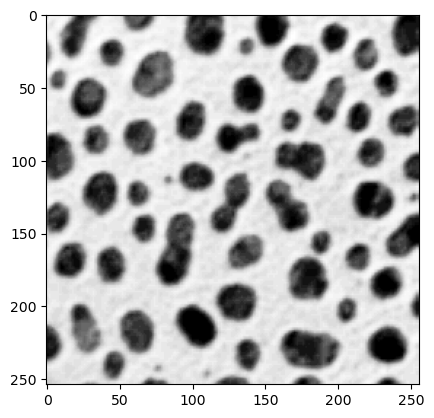

In [4]:
plt.imshow(img1, cmap="Greys")

In [5]:
img2_transpose = np.transpose(img2)
ch1 = img2_transpose[0]
ch2 = img2_transpose[1]
ch3 = img2_transpose[2]

In [6]:
red = [(0, 0, 0), (1, 0, 0)]
green = [(0, 0, 0), (0, 1, 0)]
blue = [(0, 0, 0), (0, 0, 1)]
yellow = [(0, 0, 0), (1, 1, 0)]
magenta = [(0, 0, 0), (1, 0, 1)]
cyan = [(0, 0, 0), (0, 1, 1)]
lut_red = LinearSegmentedColormap.from_list("Custom", red, N=256)
lut_green = LinearSegmentedColormap.from_list("Custom", green, N=256)
lut_blue = LinearSegmentedColormap.from_list("Custom", blue, N=256)
lut_cyan = LinearSegmentedColormap.from_list("Custom", cyan, N=256)
lut_magenta = LinearSegmentedColormap.from_list("Custom", magenta, N=256)
lut_yellow = LinearSegmentedColormap.from_list("Custom", yellow, N=256)

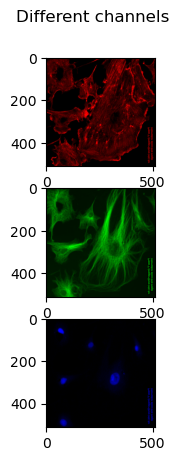

In [7]:
fig, axs = plt.subplots(3)
fig.suptitle("Different channels")
axs[0].imshow(ch1, cmap=lut_red)
axs[1].imshow(ch2, cmap=lut_green)
axs[2].imshow(ch3, cmap=lut_blue)

In [8]:
ch1_conc = np.concatenate(img2_transpose[0])
ch2_conc = np.concatenate(img2_transpose[1])
ch3_conc = np.concatenate(img2_transpose[2])

In [9]:
hist1 = np.histogram(ch1_conc, bins=255)
hist2 = np.histogram(ch2_conc, bins=255)
hist3 = np.histogram(ch3_conc, bins=255)

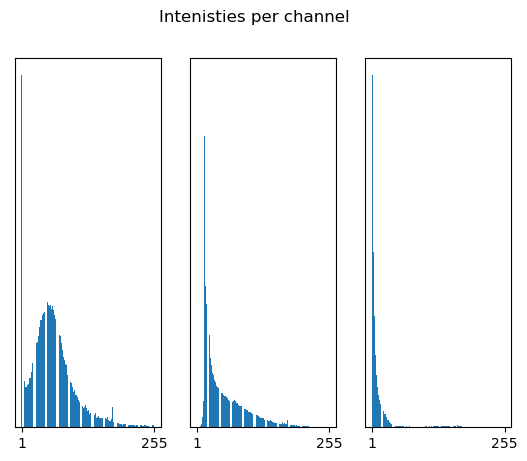

In [10]:
fig1, axs = plt.subplots(1, 3)
fig1.suptitle("Intenisties per channel")
axs[0].bar(hist1[1][1:-1], hist1[0][1:])
axs[0].set_yticks([])
axs[0].set_xticks([1, 255])

axs[1].bar(hist2[1][1:-1], hist2[0][1:])
axs[1].set_yticks([])
axs[1].set_xticks([1, 255])

axs[2].bar(hist3[1][1:-1], hist3[0][1:])
axs[2].set_yticks([])
axs[2].set_xticks([1, 255]);

## Changing brightness and contrast

$g(i,j)$

In [303]:
alpha = input("Gain:")
beta = input("Bias:")

Gain: 1
Bias: 300


In [308]:
def change_brightness_contrast(alpha, beta,channel):
    
    alpha, beta = float(alpha), int(beta)
    new_ch1 = alpha * channel - beta
    binwidth = 256 / (256 + abs(beta))
    print(np.amin(new_ch1),np.amax(new_ch1))
    if beta > 0:
        new_ch1_conc = np.concatenate(new_ch1)
        new_ch1_hist = np.histogram(new_ch1_conc, bins=np.arange(0, 256 -binwidth, binwidth))
    else:
        new_ch1[new_ch1>255]=255
        #print(np.amax(new_ch1),np.amin(new_ch1))
        new_ch1_conc = np.concatenate(new_ch1)
        new_ch1_hist = np.histogram(new_ch1_conc, bins=np.arange(0, 256 + binwidth, binwidth))
        #new_ch1_hist = np.histogram(new_ch1_conc, bins=np.arange(0, 256, binwidth))
        #print(new_ch1_hist[0])
        #new_ch1_hist = np.histogram(new_ch1_conc, bins=np.arange(np.amin(new_ch1)- binwidth, np.amax(new_ch1) + binwidth, binwidth))
        #print(np.arange(0, 256 + binwidth, binwidth))
    fig, axs = plt.subplots(2, 2)
    axs[0][0].set_title("Original")
    axs[0][0].imshow(channel, cmap=lut_red)
    axs[0][0].set_xticks([])
    axs[0][0].set_yticks([])
    axs[0][1].set_title("Contrast and brigthness changed")
    new_red = [(-beta / 256, 0, 0), (1, 0, 0)]
    new_lut_red = LinearSegmentedColormap.from_list("Custom", new_red, N=256)
    axs[0][1].imshow(new_ch1, cmap=new_lut_red)
    axs[0][1].set_xticks([])
    axs[0][1].set_yticks([])
    axs[1][0].bar(hist1[1][1:-1], hist1[0][1:])
    axs[1][0].set_xticks([1, 255])
    axs[1][0].set_yticks([])
    axs[1][1].bar(new_ch1_hist[1][1:-1], new_ch1_hist[0][1:])
    axs[1][1].set_xticks([1, 255])
    #axs[1][1].set_ylim([0,100000])
    #axs[1][1].set_yticks([])

-300.0 -45.0


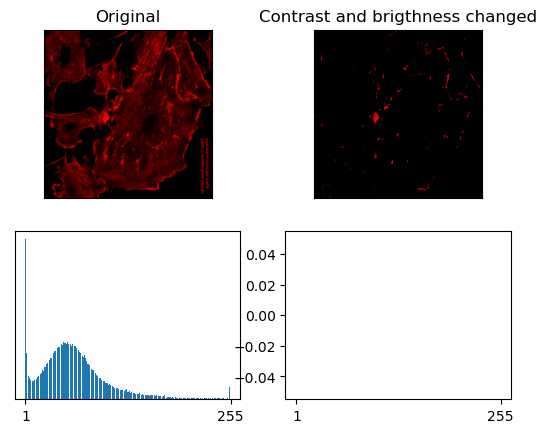

In [309]:
change_brightness_contrast(alpha, beta, ch1)